In [4]:
import os
import pandas as pd
cwd = os.path.abspath('') 
files = os.listdir(cwd)

In [5]:
os.chdir(r"C:\Users\limst\Documents\github\Covid-19-Singapore-Analysis\Data\Facebook Data\Cleaned Data")

In [6]:
files = os.listdir(cwd)
files

['fb_merged_data.csv']

In [7]:
#create a dataframe to store the merged data for each platform
df = pd.DataFrame()

In [8]:
for file in files:
     if file.endswith('csv'):
            df = df.append(pd.read_csv(file), ignore_index=True) 
df.head()

,Unnamed: 0,Post ID,Username,Comment,Post_title,date,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,images
0,0,1.015911e+16,Kapitan Gostan,"The ""Lau Hero"" still sings! Creative video in...",It has been a year since COVID-19 changed our ...,6/2/2021 10:00,NaN,https://scontent.fsin5-1.fna.fbcdn.net/v/t42.1...,https://scontent.fsin5-1.fna.fbcdn.net/v/t15.5...,1.554871e+15,4570,116,0,https://facebook.com/gov.sg/videos/15548713582...,[]
1,1,1.015911e+16,Robert Wong,"Happy New Year，Happy 牛 Year, 牛年吉祥",It has been a year since COVID-19 changed our ...,6/2/2021 10:00,NaN,https://scontent.fsin5-1.fna.fbcdn.net/v/t42.1...,https://scontent.fsin5-1.fna.fbcdn.net/v/t15.5...,1.554871e+15,4570,116,0,https://facebook.com/gov.sg/videos/15548713582...,[]
2,2,1.015911e+16,Lily Lim,Ok you all can enjoy yourselves but don't forg...,It has been a year since COVID-19 changed our ...,6/2/2021 10:00,NaN,https://scontent.fsin5-1.fna.fbcdn.net/v/t42.1...,https://scontent.fsin5-1.fna.fbcdn.net/v/t15.5...,1.554871e+15,4570,116,0,https://facebook.com/gov.sg/videos/15548713582...,[]
3,3,1.015911e+16,Jasmaine Cheong,I like this video very much..so local,It has been a year since COVID-19 changed our ...,6/2/2021 10:00,NaN,https://scontent.fsin5-1.fna.fbcdn.net/v/t42.1...,https://scontent.fsin5-1.fna.fbcdn.net/v/t15.5...,1.554871e+15,4570,116,0,https://facebook.com/gov.sg/videos/15548713582...,[]
4,4,1.015911e+16,Robert Teo,You can’t be steady unless you wear your mask ...,It has been a year since COVID-19 changed our ...,6/2/2021 10:00,NaN,https://scontent.fsin5-1.fna.fbcdn.net/v/t42.1...,https://scontent.fsin5-1.fna.fbcdn.net/v/t15.5...,1.554871e+15,4570,116,0,https://facebook.com/gov.sg/videos/15548713582...,[]


In [9]:
df.shape

(23988, 15)

In [11]:
import pandas as pd
import numpy as np
import re
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import datetime
import emoji

def remove_emoji(text):
    emoji_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

def remove_hashtag_mentions_urls(text):
    return re.sub(r"(?:\@|\#|https?\://)\S+", "", text)

def stopwords_ls(additional_stopwords):
    stop_list = stopwords.words('english')
    for word in additional_stopwords:
        stop_list.append(word)
    
    return stop_list

def text_preprocessing(df, column_name, stopword_list):
    output = []
    for text in df[column_name]:
        text = remove_hashtag_mentions_urls(text)
        text = remove_emoji(text)
        text_lower = [w.lower() for w in text_tokenize]
        text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
        text_stopremoved = [w for w in text_words_only if w not in stopword_list]

        output.append(text_stopremoved)

    return output

def demojize_text(df, column_name):
    emoji_decoded_tweets = []

    for text in df[column_name]:
        text = emoji.demojize(text)
        
        emoji_decoded_tweets.append(text)
    
    return emoji_decoded_tweets

def instagram_text_processing(df, stopword_list):

    text_processed = text_preprocessing(df, 'comment', stopword_list)

    text_demojize = demojize_text(df, 'comment')

    df['processed_text'] = text_processed
    df['demojize_text'] = text_demojize

    return df

In [21]:
import re
import emoji
from nltk.tokenize import word_tokenize



tweet = df['Comment']
cleaned_text = []
for i in range(len(tweet)):
    text = tweet[i]
    # removing mentions, hashtags, URLs from tweet
    text = re.sub(r"(?:\@|\#|https?\://)\S+", "", text)
    text = remove_emoji(text)
    #separates the sentence by words
    text_tokenize = word_tokenize(text)

    text_lower = [w.lower() for w in text_tokenize]
    #removes anything that are not alphabets
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = " ".join(text_words_only)
    cleaned_text.append(text_joined)




['The', '``', 'Lau', 'Hero', "''", 'still', 'sings', '!', 'Creative', 'video', 'indeed', ',', 'well', 'done', '!']
['Happy', 'New', 'YearHappy', 'Year', ',']
['Ok', 'you', 'all', 'can', 'enjoy', 'yourselves', 'but', 'do', "n't", 'forget', 'the', 'air', 'around', 'you', 'got', 'covit19', '.', 'Do', "n't", 'breathe', 'in', '.']
['I', 'like', 'this', 'video', 'very', 'much', '..', 'so', 'local']
['You', 'can', '’', 't', 'be', 'steady', 'unless', 'you', 'wear', 'your', 'mask', 'whenever', 'necessary', '.']
[]
['The', 'Year', 'Of', 'The', 'OX', '.....', 'Is', 'All', 'About', 'Pushing', 'Oneself', 'FORWARD', ':', 'WORK', 'HARD', ':', 'DON', '’', 'T', 'SLACK', ':']
['This', 'is', 'hilarious', 'and', 'authentic']
['Very', 'nice']
['Ya', ',', 'we', 'are', 'preparing', 'reunion', 'meal', 'for', 'our', 'Neighbours', 'upstairs']
[]
['No', 'other', 'thing', 'in', 'this', 'picture', 'influence', 'me', '.', 'Whenever', 'Wong', 'Chin', 'Yen', 'appears', ',', 'song', 'after', 'song', 'came', 'into', 'm

['Elderly', 'means', '65+', ',', '70+', 'or', '80+']
['Why', 'need', 'to', 'wear', 'mask', 'if', 'u', 'are', 'vaccinated', '?', 'Make', 'no', 'sense', '...']
['Excellent', '.']
['Excellent', '.']
[]
['Imported', 'cases', 'are', 'endless', '.', 'Hopeless', '.']
['Yes', 'that', "'s", 'Singapore', '..']
['Great']
[]
['Alright', '!', 'Phase', '3', 'incoming']
['This', 'is', 'a', 'question', 'for', 'Prof', 'Vernon', 'Lee', '.', 'You', 'have', 'a', 'tough', 'time', 'tracing', 'contacts', 'but', 'I', 'saw', 'that', 'KTV', 'now', 'are', 'open', 'masquerading', 'as', 'bistro', 'with', 'girls', 'running', 'around', 'rooms', 'serving', 'customers', '.', 'Imaging', 'if', 'an', 'outbreak', 'happen', 'in', 'this', 'KTV', '(', 'say', 'one', 'at', 'Sophia', 'Road', ',', 'Peace', 'Center', 'or', 'the', 'one', 'at', '8', 'Floor', 'Textile', 'Centre', ')', 'Can', 'you', 'imaging', 'how', 'hard', 'would', 'it', 'be', 'for', 'a', 'contract', 'tracer', 'to', 'trace', 'the', 'origin', '.', 'All', 'the', 'guy

['Thanks', 'to', 'God', 'thanks', 'to', 'Singapore', 'government']
['Soon', 'zero', 'cases']
['Wow', 'really', 'good']
['Vadi', 'Pvss', 'is', 'this', 'you', 'neh', '?']
['I', 'm', 'waiting']
['No', 'fire', 'walking', 'tis', 'year', 'how', 'celebrate', 'Diwali', 'tis', 'year', 'how', 'feeling', 'den', 'no', 'thaispuam', 'also', 'next', 'year', "'s", 'have', 'mood', 'celebrate', 'Diwali', 'pls']
['Nationality', 'India', 'but', 'fly', 'from', 'UAE', '🤔']
['Goodness', 'community', 'keep', 'on', 'increasing', 'daily', 'but', 'on', 'single', 'digit', 'hopefully', 'stay', 'there', 'it', 'understandable', 'the', 'world', 'at', 'large', 'seem', 'to', 'be', 'defeated', 'by', 'convid19', 'and', 'winter', 'is', 'around', 'the', 'corner', 'so', 'let', 'us', 'wear', 'mask', 'and', 'social', 'distancing']
['After', 'the', 'security', 'guard', 'and', 'temperature', 'screener', 'at', 'Terminal', '3', 'got', 'it', 'from', 'the', 'imported', 'cases', ',', 'we', 'are', 'told', 'to', 'fasten', 'our', 'belt

['Malaysia', 'just', 'imported', 'one', 'from', 'Singapore', '.', 'Why', 'and', 'how', '?']
['Hmm', 'when', 'was', 'the', 'last', 'time', 'this', 'report', 'came', 'out', 'this', 'early', '?']
['Am', 'so', 'glad', 'they', 'are', 'going', 'back', 'to', 'office', '.', 'Those', 'working', 'from', 'home', 'have', 'caused', 'the', 'monthly', 'electricity', 'to', 'increase', 'by', 'double', '.', 'Household', 'expenses', 'have', 'all', 'increased', 'by', 'double', '.......']
['Company', 'classified', 'work', 'from', 'home', 'not', 'paid', ',', 'how', 'does', 'MOM', 'handle', 'such', 'issue', '?', 'Employees', 'scheduled', 'to', 'work', 'on', 'alternate', 'days', 'only', 'and', 'get', 'paid', 'when', 'report', 'to', 'office', 'to', 'work', '.', 'Employees', 'expected', 'to', 'finish', 'work', 'during', 'paid', 'days', 'only', 'When', 'previous', 'working', 'days', 'in', 'a', 'week', 'complete', 'work', 'assigned', '.', 'How', 'MOM', 'look', 'at', 'such', 'arrangements', '?', '?', '?']
['A', 'w

['Is', 'there', 'anyway', 'to', 'catch', 'up', 'on', 'this', 'series', 'if', 'I', 'miss', 'it', '?']
['Ronnel', 'C.', 'Rapisura', ',', 'Ayumi', 'Darsuki', ',', 'Felynor', 'Pacog', 'Badua', 'rem', 'to', 'tune', 'in']
['Stop', 'imported', 'cases', 'unless', 'they', 'are', 'returning', 'citizens', '!', 'Our', 'front', 'liners', 'have', 'done', 'wonders', 'to', 'overcome', 'the', 'heavy', 'no', '’', 's', 'and', 'we', 'don', '’', 't', 'need', 'to', 'put', 'them', 'at', 'risk', '!', 'Stop', 'all', 'countries', 'who', 'are', 'known', 'to', 'send', 'out', 'their', 'infected', 'irresponsibly', '!']
['AuthorGov.sgHi', ',', 'we', 'understand', 'that', 'the', 'number', 'of', 'imported', 'cases', 'may', 'seem', 'alarming', '.', 'The', 'Stay-Home', 'Notice', 'policy', 'has', 'helped', 'to', 'separate', 'the', 'imported', 'cases', 'from', 'the', 'local', 'community', 'at', 'large', 'to', 'ensure', 'that', 'these', 'cases', 'are', 'ring-fenced', '.', 'This', 'is', 'the', 'approach', 'that', 'was', 'ta

['The', 'song', 'brings', 'a', 'lot', 'of', 'memories', 'during', 'my', 'primary', 'school', 'days', '...', 'Yes', 'I', 'have', 'some', 'tears', 'when', 'this', 'song', 'pop', 'up', 'miss', 'this', 'really', 'meaningful', 'song', '...', 'Thank', 'u', 'for', 'singing', 'it', 'well', '...', 'Awesome']
['Thank', 'you', 'for', 'the', 'translation', 'or', 'I', 'would', 'hv', 'overlooked', 'its', 'meaningful', 'lyrics', 'like', 'I', 'did', 'during', 'sch', 'days', '.', 'Beautiful', 'rendition', 'by', 'diff', 'races', 'here', 'dat', 'really', 'strikes', 'a', 'chord', 'with', 'true', 'blue', 'Singaporeans', '!', 'This', 'should', 'b', 'the', 'official', 'theme', 'song', 'for', 'NDP', '2020', 'to', 'unite', 'SG', '!']
['Favourite', 'song', 'since', 'years', 'ago', '.', 'Finally', 'it', 'surfaced', 'again', '.', 'Shared', 'with', 'my', 'kids', 'that', 'although', 'this', 'is', 'a', 'Malay', 'song', ',', 'the', 'lyrics', 'of', 'the', 'song', 'is', 'so', 'meaningful', 'to', 'encourage', 'everyone'

['Siewpeng', 'Tan']
['Ho', 'May', 'Li']
['Shatty', 'Valenzuela-Fernandez']
['VirGemzz', 'Diareez']
['Suresh', 'Kumer']
['so', 'cute', '!', '!', '!', '!']
['Super', 'very', 'good', 'brother']
['တစ္ေယာက္ေလာက္ပါ']
['Singapore', 'hdb', 'landlord', 'doesn', '’', 't', 'like', 'the', 'tenant', 'to', 'work', 'from', 'home', ',', 'how', 'ar', '?']
['Ko', 'Phyo']
[]
['Very', 'good']
['Good']
['Stay', 'safe']
['Safest', 'is', 'to', 'hold', 'it', 'later', 'in', 'April', '2021', '.', 'Too', 'bad', 'no', 'expert', 'would', 'speak', 'up', 'about', 'this', '.']
['Oh', 'my', 'God', ',', 'there', 'are', 'a', 'lot', 'of', 'viruses', 'today', '.', 'I', 'think', 'it', 'will', 'end', 'this', 'month', ',', 'but', 'it', 'is', 'not', 'over', '.', 'God', 'knows', 'when', 'it', 'will', 'end', '.', 'Do', "n't", 'worry', '.', 'Stay', 'at', 'home', '.', 'Stay', 'healthy', '.', 'Stay', 'well.tnq', 'you', 'Singapore', 'all']
['Still', 'have', 'imported', '?']
[]
['Social', 'distancing', 'to', 'avoid', 'a', 'second', 

['What', 'if', 'the', 'traveller', 'says', 'he', 'has', 'no', 'money', 'to', 'pay', 'for', 'the', 'test', 'n', 'facilities', '?']
['Would', 'citizens', 'returning', 'to', 'Singapore', 'for', 'good', 'in', 'the', 'coming', 'months', 'be', 'required', 'to', 'pay', 'for', 'Covid', 'tests', '?']
['China', 'is', 'China', ',', 'why', 'named', 'them', 'as', 'Mainland', 'China', '?', '?', '?', 'Since', 'when', 'we', 'are', 'one', 'of', 'the', 'islands', 'to', 'China', '.', 'Beijing', 'is', 'hitting', 'by', 'second', 'wave', 'of', 'the', 'virus', '.', 'Are', 'we', 'still', 'welcome', 'then', 'to', 'enter', 'our', 'land', '.', 'Have', 'we', 'not', 'learn', 'from', 'our', 'last', 'mistake', 'for', 'letting', 'those', 'Wuhan', 'tourists', 'entering', '?']
['You', 'got', 'to', 'be', 'kidding', 'you', 'allow', 'China', '?', 'What', "'s", 'happening', 'in', 'Beijing', 'now', '!']
['May', 'I', 'know', 'if', 'HK', 'travellers', 'still', 'need', 'to', 'serve', '14-day', 'quarantine', ',', 'only', 'they'

['We', 'can', 'ride', 'thru', 'this', '!', 'Be', 'strong', '!', 'Sg', '!']
['Drive', 'safe', ',', 'Inche', 'Fadzuly', '.', 'Glad', 'that', 'you', 'got', 'the', 'SIRS', 'grant', '.', 'Thank', 'you', 'for', 'taking', 'good', 'care', 'of', 'your', 'family', 'and', 'society', '.', 'Aimiin', '.', 'Amitabha', '.', 'Amen']
[]
['All', 'taxi', 'drivers', 'are', 'hard', 'working']
[]
['Thks', ',', 'Sir', '.']
[]
['Bagusnya']
[]
['So', 'touching']
['Kita', 'boleh', 'bersama', 'mengatasi', 'cabaran', 'semasa', '.']
['....']
['There', 'is', 'a', 'will', ',', 'there', 'is', 'a', 'way', '.']
['Very', 'good', '!', '!', '!']
[]
['oh', 'yea', 'i', 'would', 'go', 'mad']
['Yes', 'WE', 'CAN']
['Simply', 'heart', 'warming', 'and', 'encouraging', 'especially', 'to', 'the', 'younger', 'generation', '!']
['.', '.']
['We', 'shall', 'overcome', 'all', 'odds']
['Hisham', 'Sharif']
['Good', 'morning', ',', 'yes', ',', 'we', "'ll", 'get', 'there', '....']
[]
[]
['So', 'Singapore', 'will', 'open', 'up', 'in', 'Aug',

['6', 'are', 'linked', 'how', 'abt', 'the', 'other', '5', '?']
['Discharge', 'cases', 'low', 'for', '2', 'days', '.', 'Why', 'ah', '?']
[]
['Thank', 'you', 'to', 'all', 'the', 'frontline', 'workers', 'for', 'keeping', 'us', 'safe', '.', 'Take', 'care', 'and', 'God', 'Bless', 'you', 'and', 'your', 'family']
['Thank', 'you', 'to', 'all', 'of', 'you', '.', 'God', 'bless', 'and', 'protect', 'you', 'all', '.']
['We', 'are', 'not', 'singapore', 'citizens', 'normal', 'worker', '.', 'Thank', 'you', 'for', 'all', 'the', 'singapore', 'Management', '.']
['thanks', 'to', 'all', 'our', 'frontliners', ',', 'we', 'salute', 'you🧏\u200d🧏\u200d', 'shoutout', 'to', 'Vaigash', 'Chandran']
['Thank', 'you', 'very', 'much', 'All', 'Frontliners', 'Sir', 'and', 'Mam', ',', 'keep', 'safe', 'always', 'god', 'bless', 'all', 'of', 'you', 'your', 'all', 'The', 'Hero', '.', 'Be', 'stay', 'Strong', 'always', '.']
['Thank', 'you', 'for', 'all', 'your', 'effort', 'and', 'service', ',', 'appreciate', 'deeply', ',', 'wis

['Sure', 'we', 'can', 'if', 'we', "'re", 'everyone', 'do', 'our', 'part']
['Maybe', 'piped', 'in', '(', 'hip', ')', 'Muzic', '....', 'might', 'help', 'drown', 'the', 'silence', '?', 'And', 'if', 'you', 'don', '’', 't', 'like', '...', 'listen', 'to', 'your', 'own']
['Do', "n't", 'talk', 'on', 'phone', 'or', 'speak', 'to', 'one', 'another', 'while', 'in', 'the', 'public', 'transports', '?', 'You', 'think', 'a', 'certain', 'bunch', 'of', 'covidiots', 'will', 'listen', '?']
['can', 'travel', 'during', 'august', '?']
['Useless', '4G']
['“', 'requiring', 'commuters', 'to', 'avoid', 'speaking', 'to', 'each', 'other', 'or', 'on', 'their', 'phones', ',', 'and', 'to', 'keep', 'their', 'masks', 'on', 'at', 'all', 'times', '“', '”', 'Yes', ',', 'we', 'need', 'to', 'make', 'it', 'our', 'public', 'transport', 'culture', 'and', 'change', 'our', 'habit', ',', 'educate', 'public', 'not', 'to', 'talk', 'if', 'unnecessary', 'in', 'the', 'cabin', 'or', 'buses', ',', 'we', 'need', 'to', 'have', 'a', 'campa

['God', '.helping', '.', 'please', 'please', 'u', 'finish', 'cornavirus', 'amin']
['Seems', 'there', 'is', 'a', 'never', 'ending', 'infections', 'among', 'the', 'foreign', 'workers', '.']
['What', 'is', 'going', 'wrong', 'this', 'time', 'round', ',', 'why', 'is', 'the', 'figure', 'still', 'so', 'high', '?']
['Aha', 'allha', 'helping']
['...', '98']
[]
['Safe', 'Entry']
['I', 'sewed', 'these', 'masks', 'with', 'my', 'favour', 'prints', ',', 'polka', 'dots', '.']
['Are', 'these', 'type', 'of', 'mask', 'allow', 'on', 'the', 'streets', '?']
['Using', 'tote', 'bag', 'material', '.']
['Thks', '.', 'Bro', '.', 'I', 'as', 'Singaporean', 'we', 'are', 'trying', 'our', 'best', 'to', 'do', 'things', 'to', 'get', 'back', 'to', 'normal']
['Super', 'bro']
['Thanka', 'Bro', 'yes', 'singapore', 'very', 'good', 'saftey']
['Thanks', 'pro']
['Thanks', 'pro']
['Super']
['Thank', 'you', 'sir']
['Yes', 'super', 's', 'g']
['Super', 'thanks', 'anna']
['Good', '.', 'Thanks']
['Nandi', 'Surya', 'naa', 'Dubai', '

['I', 'dont', 'no', 'wiht', 'can', 'do', 'now']
['so', 'now', 'wats', 'the', 'counts', 'of', 'locals', '?']
['Jialat']
[]
['CB']
['Please', 'read', 'this', ',', 'do', "n't", 'just', 'relax', 'and', 'be', 'content', 'when', 'the', 'community', 'cases', 'remain', 'double', 'digit', '.', 'The', 'whole', 'community', 'paper', 'concept', 'is', 'only', 'artificial', '.', 'In', 'reality', ',', 'the', 'entire', 'country', 'include', 'everyone', 'on', 'the', 'lsland']
[]
['🤦\u200d🤷\u200dWhy', 'the', 'community', 'spread', 'not', 'continuing', 'downward', 'even', 'we', 'have', 'completed', 'first', '4', 'weeks', 'of', 'CB', '?', '?', 'Can', 'someone', 'explain', 'all', 'these', 'community', 'infected', 'case', 'clearly', 'to', 'us', '?']
['I', 'downloaded', 'and', 'login', 'with', 'Singpass', '...', 'I', 'dunno', 'how', 'to', 'answer', '(', 'see', 'attached', ')', 'I', "'m", 'order', 'to', 'proceed', 'further', '.', 'There', "'s", 'no', 'none', 'of', 'the', 'above', '...', 'Yes', 'I', 'am', 'fro

['The', 'dormitories', 'infections', 'seems', 'not', 'properly', 'under', 'controlled', '.', 'It', "'s", 'still', 'spreading', 'fast', '.', 'Why', '?', '?']
['Any', 'good', 'suggestion', 'by', 'the', 'ministry', '.', 'Food', 'delivery', 'to', 'home', ',', 'fine', 'we', 'eat', 'at', 'home', '.', 'Food', 'send', 'to', 'company', ',', 'where', 'can', 'they', 'eat', '.', 'Food', 'despatch', 'team', 'where', 'can', 'they', 'eat', '.', 'No', 'seating', 'down', 'eating', 'in', '.', 'So', 'where', 'should', 'they', 'eat', '.', 'If', 'their', 'home', 'is', 'nearby', ',', 'yes', 'can', 'go', 'home', 'n', 'eat', '.']
['Wonder', 'how', 'many', 'tests', 'were', 'done', '.', 'Information', 'on', 'number', 'of', 'tests', 'done', 'plus', 'number', 'of', 'migrant', 'workers', 'isolated', 'without', 'testing', 'would', 'help', 'put', 'the', 'numbers', 'into', 'right', 'perspective', '.']
['Maybe', 'safe', 'distancing', 'officers', 'need', 'a', 'uniform', '.', 'I', 'suggest', 'a', 'brown', 'shirt', 'with

TypeError: expected string or bytes-like object

In [24]:
all_facebook = " ".join(row for row in cleaned_text)

In [25]:
all_facebook

'the lau hero still sings creative video indeed well done happy new yearhappy year ok you all can enjoy yourselves but do forget the air around you got do breathe in i like this video very much so local you can t be steady unless you wear your mask whenever necessary  the year of the ox is all about pushing oneself forward work hard don t slack this is hilarious and authentic very nice ya we are preparing reunion meal for our neighbours upstairs  no other thing in this picture influence me whenever wong chin yen appears song after song came into my head music over covid singapore steady la i am a bit sceptical when you say look out for one another especially with the pax ruling this is so cute and reminds me of the ntuc income ad wee xuan yi ong tong sing  becky cheah not bad matthew ng ws this adv is cute when watch on tv a bit weird video this year steady la pax together  artist wish everyone happy lunar new year   happy chinese new year everyone very good video   happy chinese new y

In [26]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [28]:
#create a mask of the photo that you want to use
instagram_mask = np.array(Image.open("facebook_logo.png"))
#photos that have values all zero are not recommended
instagram_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

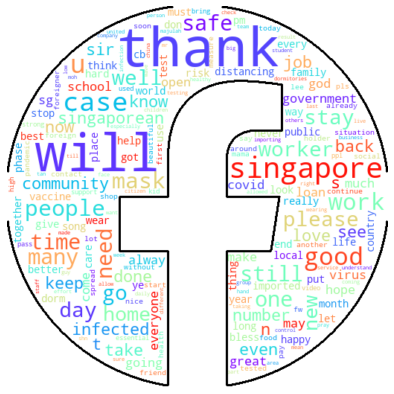

In [51]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
# Generate wordcloud
#method 1 (uses colormap)
image_colors = ImageColorGenerator(instagram_mask)
cloud = WordCloud(width = 3000, height = 2000, background_color='white', colormap='rainbow', collocations=False, stopwords = STOPWORDS, mask=instagram_mask,contour_color='black',contour_width=2).generate(all_facebook)
# Plot
plt.figure(figsize=[7,7])
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off");
#saving the wordcloud
cloud.to_file('facebook.png')

In [ ]:
#method 2 (uses get_single_color_func)
import wordcloud as wc

cloud = wc.WordCloud(stopwords=STOPWORDS,color_func=wc.get_single_color_func('darkorange'),
                    background_color='white',max_words=2000,random_state=42,
                    width=2000, height=1000,mask=instagram_mask,contour_color='black',contour_width=2).generate(all_tweets)
plt.figure(figsize=[7,7])

plt.imshow(cloud,interpolation='bilinear')
plt.axis("off");
#cloud.to_file("reddit.png")

In [ ]:
#method 3 (uses colour from the picture)
import wordcloud as wc
image_colors = ImageColorGenerator(instagram_mask)
cloud = wc.WordCloud(stopwords=STOPWORDS,color_func=image_colors,
                    background_color='white',max_words=2000,random_state=42,
                    width=2000, height=1000,mask=instagram_mask,contour_color='black',contour_width=2).generate(all_tweets)
plt.figure(figsize=[7,7])

plt.imshow(cloud,interpolation='bilinear')
plt.axis("off");
cloud.to_file("reddit1.png")

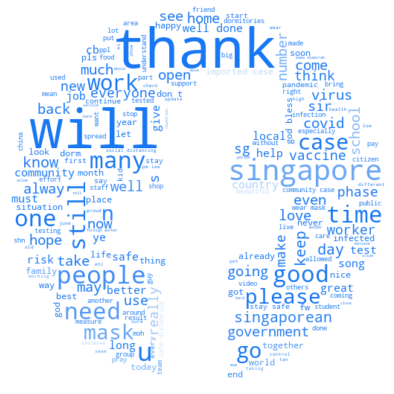

In [34]:
#also uses colour from the picture 
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=2000, height=1000,mask=instagram_mask,mode = "RGBA").generate(all_facebook)
image_colors = ImageColorGenerator(instagram_mask)
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
#wordcloud.to_file("reddit2.png")
